In [283]:
import os
import pandas as pd
import scanpy
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
clonotypes_dir = 'GSE185381_TCR/clonotypes/filtered_clonotypes/'
os.listdir(clonotypes_dir)

['GSM5613810_2020-05-22-5prime_1_vdj_t_filtered_contig_annotations.csv',
 'GSM5613807_2019-10-21-1-Control0004_vdj_t_filtered_contig_annotations.csv',
 'GSM5613820_2021-04-29-2910_cDNA_vdj_t_filtered_contig_annotations.csv',
 'GSM5613818_2021-04-29-0693_cDNA_vdj_t_filtered_contig_annotations.csv',
 'GSM5613821_2021-04-29-2975_cDNA_vdj_t_filtered_contig_annotations.csv',
 'GSM5613822_2021-04-29-3948_cDNA_vdj_t_filtered_contig_annotations.csv',
 'GSM5613809_2020-03-18-82_vdj_t_filtered_contig_annotations.csv',
 'GSM5613815_2020-10-06-5prime_cDNA5_vdj_t_filtered_contig_annotations.csv',
 'GSM5613811_2020-05-22-5prime_2_vdj_t_filtered_contig_annotations.csv',
 'GSM5613814_2020-10-06-5prime_cDNA3-AML051_vdj_t_filtered_contig_annotations.csv',
 'GSM5613816_2021-04-29-0102_cDNA_vdj_t_filtered_contig_annotations.csv',
 'GSM5613812_2020-08-07-MDS-AML_cDNA1_vdj_t_filtered_contig_annotations.csv',
 'GSM5613808_2020-03-18-52-Dx_vdj_t_filtered_contig_annotations.csv',
 'GSM5613819_2021-04-29-1133_c

In [33]:
clonotype_prefixes = tuple([
    'GSM5613807_2019-10-21-1-Control0004',
    'GSM5613808_2020-03-18-52-Dx',
    'GSM5613809_2020-03-18-82',
    'GSM5613810_2020-05-22-5prime_1',
    'GSM5613811_2020-05-22-5prime_2',
    'GSM5613812_2020-08-07-MDS-AML_cDNA1',
    'GSM5613813_2020-08-07-MDS-AML_cDNA2',
    'GSM5613814_2020-10-06-5prime_cDNA3-AML051',
    'GSM5613815_2020-10-06-5prime_cDNA5',
    'GSM5613816_2021-04-29-0102_cDNA',
    'GSM5613817_2021-04-29-0134_cDNA',
    'GSM5613818_2021-04-29-0693_cDNA',
    'GSM5613819_2021-04-29-1133_cDNA',
    'GSM5613820_2021-04-29-2910_cDNA',
    'GSM5613821_2021-04-29-2975_cDNA',
    'GSM5613822_2021-04-29-3948_cDNA',
])


expression_prefixes = tuple([
    'X2019.10.21.1.Control0004',
    'X2020.03.18.52.Dx',
    'X2020.03.18.82',
    'X2020.05.22.5prime_1',
    'X2020.05.22.5prime_2',
    'X2020.08.07.MDS.AML_cDNA1',
    'X2020.08.07.MDS.AML_cDNA2',
    'X2020.10.06.5prime_cDNA3.AML051',
    'X2020.10.06.5prime_cDNA5',
    'X2021.04.29.0102_cDNA',
    'X2021.04.29.0134_cDNA',
    'X2021.04.29.0693_cDNA',
    'X2021.04.29.1133_cDNA',
    'X2021.04.29.2910_cDNA',
    'X2021.04.29.2975_cDNA',
    'X2021.04.29.3948_cDNA',
])

clonotype_2_prefix = {
    clonotype_prefixes[i] : expression_prefixes[i] 
    for i in range(len(clonotype_prefixes))
}

In [50]:
adata.obs.columns

Index(['Number of mRNA transcripts', 'Number of genes',
       'Percentage of mitochondrial genes', 'Orig ident', 'CloneType',
       'CloneType quantity', 'Sample run', 'Sample ID', 'Subject ID',
       'Condition', 'Tissue', 'Gender', 'Storage technique',
       'Author's cell type', 'Cell source', 'Sequencing platform',
       'Quantification', 'Age', 'Dx', 'DxELN Cytogenetic', 'Cytogenetics',
       'FAB', 'BM Blasts', 'BMT in CR1', 'Risk', 'Reason', 'Age group',
       'Sampling technique', 'Sampling site', 'Genome', 'Cell sorting'],
      dtype='object')

In [43]:
DF = None
for i in os.listdir(clonotypes_dir):
    clonotype_prefix = i.replace('_vdj_t_filtered_contig_annotations.csv', '')
    df = pd.read_csv(clonotypes_dir + '/' + i)
    df['barcode'] = [
        '{}.{}'.format(
            clonotype_2_prefix[clonotype_prefix],
            bc.split('-')[0]
        ) for bc in df['barcode'].values
    ]
    if DF is None:
        DF = df
    else:
        DF = pd.concat([DF, df], axis=0)

In [46]:
DF

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,fwr3_nt,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id
0,X2020.05.22.5prime_1.AAACCTGGTCGAAAGC,True,AAACCTGGTCGAAAGC-1_contig_1,True,492,TRA,TRAV12-3,NaN,TRAJ30,TRAC,...,AAAGAAGATGGAAGGTTTACAGCACAGGTCGATAAATCCAGCAAGT...,CAMIKGDKIIF,TGTGCAATGATCAAGGGTGACAAGATCATCTTT,GKGTRLHILP,GGAAAAGGGACACGACTTCATATTCTCCCCA,1417,2,clonotype1,clonotype1_consensus_2,1.0
1,X2020.05.22.5prime_1.AAACCTGGTCGAAAGC,True,AAACCTGGTCGAAAGC-1_contig_2,True,492,TRB,TRBV20-1,TRBD2,TRBJ2-1,TRBC2,...,ACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATG...,CSASGLAGGDEQFF,TGCAGTGCTTCAGGACTAGCGGGGGGGGATGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,1343,2,clonotype1,clonotype1_consensus_1,1.0
2,X2020.05.22.5prime_1.AAACGGGGTAAAGTCA,True,AAACGGGGTAAAGTCA-1_contig_1,True,521,TRB,TRBV20-1,TRBD2,TRBJ2-1,TRBC2,...,ACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATG...,CSASGLAGGDEQFF,TGCAGTGCTTCAGGACTAGCGGGGGGGGATGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,7229,11,clonotype1,clonotype1_consensus_1,1.0
3,X2020.05.22.5prime_1.AAACGGGGTAAAGTCA,True,AAACGGGGTAAAGTCA-1_contig_2,True,492,TRA,TRAV12-3,NaN,TRAJ30,TRAC,...,AAAGAAGATGGAAGGTTTACAGCACAGGTCGATAAATCCAGCAAGT...,CAMIKGDKIIF,TGTGCAATGATCAAGGGTGACAAGATCATCTTT,GKGTRLHILP,GGAAAAGGGACACGACTTCATATTCTCCCCA,2961,3,clonotype1,clonotype1_consensus_2,1.0
4,X2020.05.22.5prime_1.AAACGGGTCAAGGTAA,True,AAACGGGTCAAGGTAA-1_contig_1,True,631,TRA,TRAV12-1,NaN,TRAJ54,TRAC,...,AATGAAGATGGAAGGTTTACAGCACAGCTCAATAGAGCCAGCCAGT...,CVVNRGKGAQKLVF,TGTGTGGTGAACAGGGGCAAGGGAGCCCAGAAGCTGGTATTT,GQGTRLTINP,GGCCAAGGAACCAGGCTGACTATCAACCCAA,885,1,clonotype2,clonotype2_consensus_2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,X2021.04.29.0134_cDNA.TTTGGTTCAGTATAAG,True,TTTGGTTCAGTATAAG-1_contig_1,True,495,TRB,TRBV12-3,NaN,TRBJ2-2,TRBC2,...,ATAGATGATTCAGGGATGCCCGAGGATCGATTCTCAGCTAAGATGC...,CASTATWELFF,TGTGCCAGCACCGCGACCTGGGAGCTGTTTTTT,GEGSRLTVL,GGAGAAGGCTCTAGGCTGACCGTACTGG,19377,12,clonotype125,clonotype125_consensus_1,1.0
1936,X2021.04.29.0134_cDNA.TTTGGTTCAGTATAAG,True,TTTGGTTCAGTATAAG-1_contig_2,True,459,TRA,TRAV13-1,NaN,TRAJ34,TRAC,...,AAGAAAGACCAACGAATTGCTGTTACATTGAACAAGACAGCCAAAC...,CAASISNTDKLIF,TGTGCAGCAAGTATAAGTAACACCGACAAGCTCATCTTT,GTGTRLQVFP,GGGACTGGGACCAGATTACAAGTCTTTCCAA,2145,1,clonotype125,clonotype125_consensus_2,1.0
1937,X2021.04.29.0134_cDNA.TTTGTCACAAGAGGCT,True,TTTGTCACAAGAGGCT-1_contig_1,True,502,TRA,TRAV17,NaN,TRAJ24,TRAC,...,AAACACAGTGGAAGATTAAGAGTCACGCTTGACACTTCCAAGAAAA...,CATDSWGKLQF,TGTGCTACGGACAGCTGGGGGAAATTGCAGTTT,GAGTQVVVTP,GGAGCAGGGACCCAGGTTGTGGTCACCCCAG,1688,1,clonotype54,clonotype54_consensus_2,1.0
1938,X2021.04.29.0134_cDNA.TTTGTCACAAGAGGCT,True,TTTGTCACAAGAGGCT-1_contig_2,True,653,TRB,TRBV5-4,TRBD1,TRBJ2-7,TRBC2,...,AATGGCAGAGGAAACTTCCCTCCTAGATTCTCAGGTCTCCAGTTCC...,CASSYQTGGEYEQYF,TGTGCCAGCAGCTATCAGACAGGGGGTGAATACGAGCAGTACTTC,GPGTRLTVT,GGGCCGGGCACCAGGCTCACGGTCACAG,3161,5,clonotype54,clonotype54_consensus_1,1.0


In [36]:
adata = scanpy.read_h5ad('GSE185381_TCR/GSE185381_TCR.h5ad')

In [59]:
DF['matched_with_adata'] = [
    True 
    if i in adata.obs_names
    else False
    for i in DF['barcode'].values
]

In [61]:
np.sum(DF['matched_with_adata'].values)

39919

In [63]:
remove_bc = DF['barcode'][
    DF['matched_with_adata'].values == False
].values

In [67]:
DF = DF.iloc[
    DF['matched_with_adata'].values == True,
    :
]

In [68]:
DF

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,matched_with_adata
0,X2020.05.22.5prime_1.AAACCTGGTCGAAAGC,True,AAACCTGGTCGAAAGC-1_contig_1,True,492,TRA,TRAV12-3,NaN,TRAJ30,TRAC,...,CAMIKGDKIIF,TGTGCAATGATCAAGGGTGACAAGATCATCTTT,GKGTRLHILP,GGAAAAGGGACACGACTTCATATTCTCCCCA,1417,2,clonotype1,clonotype1_consensus_2,1.0,True
1,X2020.05.22.5prime_1.AAACCTGGTCGAAAGC,True,AAACCTGGTCGAAAGC-1_contig_2,True,492,TRB,TRBV20-1,TRBD2,TRBJ2-1,TRBC2,...,CSASGLAGGDEQFF,TGCAGTGCTTCAGGACTAGCGGGGGGGGATGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,1343,2,clonotype1,clonotype1_consensus_1,1.0,True
8,X2020.05.22.5prime_1.AAAGCAACATTTGCCC,True,AAAGCAACATTTGCCC-1_contig_1,True,492,TRB,TRBV12-3,NaN,TRBJ2-1,TRBC2,...,CASSFTEQFF,TGTGCCAGCAGTTTTACTGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,10479,14,clonotype65,clonotype65_consensus_1,1.0,True
15,X2020.05.22.5prime_1.AACCATGGTGAGGCTA,True,AACCATGGTGAGGCTA-1_contig_1,True,496,TRB,TRBV3-1,NaN,TRBJ1-1,TRBC1,...,CASSQYPGRAEAFF,TGTGCCAGCAGCCAATATCCAGGTAGAGCTGAAGCTTTCTTT,GQGTRLTVV,GGACAAGGCACCAGACTCACAGTTGTAG,3901,9,clonotype10,clonotype10_consensus_1,2.0,True
49,X2020.05.22.5prime_1.ACACTGAGTATTCGTG,True,ACACTGAGTATTCGTG-1_contig_1,True,486,TRB,TRBV25-1,NaN,TRBJ2-1,TRBC2,...,CASRPGTGGREQFF,TGTGCCAGCAGACCCGGGACAGGGGGGAGAGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,4784,7,clonotype109,clonotype109_consensus_1,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,X2021.04.29.0134_cDNA.TTTGGTTCAGTATAAG,True,TTTGGTTCAGTATAAG-1_contig_1,True,495,TRB,TRBV12-3,NaN,TRBJ2-2,TRBC2,...,CASTATWELFF,TGTGCCAGCACCGCGACCTGGGAGCTGTTTTTT,GEGSRLTVL,GGAGAAGGCTCTAGGCTGACCGTACTGG,19377,12,clonotype125,clonotype125_consensus_1,1.0,True
1936,X2021.04.29.0134_cDNA.TTTGGTTCAGTATAAG,True,TTTGGTTCAGTATAAG-1_contig_2,True,459,TRA,TRAV13-1,NaN,TRAJ34,TRAC,...,CAASISNTDKLIF,TGTGCAGCAAGTATAAGTAACACCGACAAGCTCATCTTT,GTGTRLQVFP,GGGACTGGGACCAGATTACAAGTCTTTCCAA,2145,1,clonotype125,clonotype125_consensus_2,1.0,True
1937,X2021.04.29.0134_cDNA.TTTGTCACAAGAGGCT,True,TTTGTCACAAGAGGCT-1_contig_1,True,502,TRA,TRAV17,NaN,TRAJ24,TRAC,...,CATDSWGKLQF,TGTGCTACGGACAGCTGGGGGAAATTGCAGTTT,GAGTQVVVTP,GGAGCAGGGACCCAGGTTGTGGTCACCCCAG,1688,1,clonotype54,clonotype54_consensus_2,1.0,True
1938,X2021.04.29.0134_cDNA.TTTGTCACAAGAGGCT,True,TTTGTCACAAGAGGCT-1_contig_2,True,653,TRB,TRBV5-4,TRBD1,TRBJ2-7,TRBC2,...,CASSYQTGGEYEQYF,TGTGCCAGCAGCTATCAGACAGGGGGTGAATACGAGCAGTACTTC,GPGTRLTVT,GGGCCGGGCACCAGGCTCACGGTCACAG,3161,5,clonotype54,clonotype54_consensus_1,1.0,True


In [69]:
DF.to_csv('GSE185381_TCR/clonotypes/merged_filtered_clonotype.tsv', sep='\t')

In [5]:
DF = pd.read_csv('GSE185381_TCR/clonotypes/merged_filtered_clonotype.tsv', sep='\t', index_col=0)

In [6]:
DF.head()

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,matched_with_adata
0,X2020.05.22.5prime_1.AAACCTGGTCGAAAGC,True,AAACCTGGTCGAAAGC-1_contig_1,True,492,TRA,TRAV12-3,NaN,TRAJ30,TRAC,...,CAMIKGDKIIF,TGTGCAATGATCAAGGGTGACAAGATCATCTTT,GKGTRLHILP,GGAAAAGGGACACGACTTCATATTCTCCCCA,1417,2,clonotype1,clonotype1_consensus_2,1.0,True
1,X2020.05.22.5prime_1.AAACCTGGTCGAAAGC,True,AAACCTGGTCGAAAGC-1_contig_2,True,492,TRB,TRBV20-1,TRBD2,TRBJ2-1,TRBC2,...,CSASGLAGGDEQFF,TGCAGTGCTTCAGGACTAGCGGGGGGGGATGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,1343,2,clonotype1,clonotype1_consensus_1,1.0,True
8,X2020.05.22.5prime_1.AAAGCAACATTTGCCC,True,AAAGCAACATTTGCCC-1_contig_1,True,492,TRB,TRBV12-3,NaN,TRBJ2-1,TRBC2,...,CASSFTEQFF,TGTGCCAGCAGTTTTACTGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,10479,14,clonotype65,clonotype65_consensus_1,1.0,True
15,X2020.05.22.5prime_1.AACCATGGTGAGGCTA,True,AACCATGGTGAGGCTA-1_contig_1,True,496,TRB,TRBV3-1,NaN,TRBJ1-1,TRBC1,...,CASSQYPGRAEAFF,TGTGCCAGCAGCCAATATCCAGGTAGAGCTGAAGCTTTCTTT,GQGTRLTVV,GGACAAGGCACCAGACTCACAGTTGTAG,3901,9,clonotype10,clonotype10_consensus_1,2.0,True
49,X2020.05.22.5prime_1.ACACTGAGTATTCGTG,True,ACACTGAGTATTCGTG-1_contig_1,True,486,TRB,TRBV25-1,NaN,TRBJ2-1,TRBC2,...,CASRPGTGGREQFF,TGTGCCAGCAGACCCGGGACAGGGGGGAGAGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,4784,7,clonotype109,clonotype109_consensus_1,1.0,True


In [32]:
DF['raw_clonotype_id'] = DF['raw_clonotype_id'].fillna('None')

In [33]:
DF = DF.iloc[
    DF['raw_clonotype_id'].values != 'None',
    :
]
DF.head()

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,fwr1,fwr1_nt,cdr1,cdr1_nt,fwr2,fwr2_nt,cdr2,cdr2_nt,fwr3,fwr3_nt,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,matched_with_adata
0,X2020.05.22.5prime_1.AAACCTGGTCGAAAGC,True,AAACCTGGTCGAAAGC-1_contig_1,True,492,TRA,TRAV12-3,NaN,TRAJ30,TRAC,True,True,QKEVEQDPGPLSVPEGAIVSLNCTYS,CAGAAGGAGGTGGAGCAGGATCCTGGACCACTCAGTGTTCCAGAGG...,NSAFQY,AACAGTGCTTTTCAATAC,FMWYRQYSRKGPELLMY,TTCATGTGGTACAGACAGTATTCCAGAAAAGGCCCTGAGTTGCTGA...,TYSSGN,ACATACTCCAGTGGTAAC,KEDGRFTAQVDKSSKYISLFIRDSQPSDSATYL,AAAGAAGATGGAAGGTTTACAGCACAGGTCGATAAATCCAGCAAGT...,CAMIKGDKIIF,TGTGCAATGATCAAGGGTGACAAGATCATCTTT,GKGTRLHILP,GGAAAAGGGACACGACTTCATATTCTCCCCA,1417,2,clonotype1,clonotype1_consensus_2,1.0,True
1,X2020.05.22.5prime_1.AAACCTGGTCGAAAGC,True,AAACCTGGTCGAAAGC-1_contig_2,True,492,TRB,TRBV20-1,TRBD2,TRBJ2-1,TRBC2,True,True,GAVVSQHPSRVICKSGTSVKIECRSL,GGTGCTGTCGTCTCTCAACATCCGAGCAGGGTTATCTGTAAGAGTG...,DFQATT,GACTTTCAGGCCACAACT,MFWYRQFPKQSLMLMAT,ATGTTTTGGTATCGTCAGTTCCCGAAACAGAGTCTCATGCTGATGG...,SNEGSKA,TCCAATGAGGGCTCCAAGGCC,TYEQGVEKDKFLINHASLTLSTLTVTSAHPEDSSFYI,ACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATG...,CSASGLAGGDEQFF,TGCAGTGCTTCAGGACTAGCGGGGGGGGATGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,1343,2,clonotype1,clonotype1_consensus_1,1.0,True
8,X2020.05.22.5prime_1.AAAGCAACATTTGCCC,True,AAAGCAACATTTGCCC-1_contig_1,True,492,TRB,TRBV12-3,NaN,TRBJ2-1,TRBC2,True,True,DAGVIQSPRHEVTEMGQEVTLRCKPI,GATGCTGGAGTTATCCAGTCACCCCGCCATGAGGTGACAGAGATGG...,SGHNS,TCAGGCCACAACTCC,LFWYRQTMMRGLELLIY,CTTTTCTGGTACAGACAGACCATGATGCGGGGACTGGAGTTGCTCA...,FNNNVP,TTTAACAACAACGTTCCG,IDDSGMPEDRFSAKMPNASFSTLKIQPSEPRDSAVYF,ATAGATGATTCAGGGATGCCCGAGGATCGATTCTCAGCTAAGATGC...,CASSFTEQFF,TGTGCCAGCAGTTTTACTGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,10479,14,clonotype65,clonotype65_consensus_1,1.0,True
15,X2020.05.22.5prime_1.AACCATGGTGAGGCTA,True,AACCATGGTGAGGCTA-1_contig_1,True,496,TRB,TRBV3-1,NaN,TRBJ1-1,TRBC1,True,True,DTAVSQTPKYLVTQMGNDKSIKCEQN,GACACAGCTGTTTCCCAGACTCCAAAATACCTGGTCACACAGATGG...,LGHDT,CTGGGCCATGATACT,MYWYKQDSKKFLKIMFS,ATGTATTGGTATAAACAGGACTCTAAGAAATTTCTGAAGATAATGT...,YNNKEL,TACAATAATAAGGAGCTC,IINETVPNRFSPKSPDKAHLNLHINSLELGDSAVYF,ATTATAAATGAAACAGTTCCAAATCGCTTCTCACCTAAATCTCCAG...,CASSQYPGRAEAFF,TGTGCCAGCAGCCAATATCCAGGTAGAGCTGAAGCTTTCTTT,GQGTRLTVV,GGACAAGGCACCAGACTCACAGTTGTAG,3901,9,clonotype10,clonotype10_consensus_1,2.0,True
49,X2020.05.22.5prime_1.ACACTGAGTATTCGTG,True,ACACTGAGTATTCGTG-1_contig_1,True,486,TRB,TRBV25-1,NaN,TRBJ2-1,TRBC2,True,True,EADIYQTPRYLVIGTGKKITLECSQT,GAAGCTGACATCTACCAGACCCCAAGATACCTTGTTATAGGGACAG...,MGHDK,ATGGGCCATGACAAA,MYWYQQDPGMELHLIHY,ATGTACTGGTATCAACAAGATCCAGGAATGGAACTACACCTCATCC...,SYGVNS,TCCTATGGAGTTAATTCC,TEKGDLSSESTVSRIRTEHFPLTLESARPSHTSQYL,ACAGAGAAGGGAGATCTTTCCTCTGAGTCAACAGTCTCCAGAATAA...,CASRPGTGGREQFF,TGTGCCAGCAGACCCGGGACAGGGGGGAGAGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,4784,7,clonotype109,clonotype109_consensus_1,1.0,True


## 1. Fraction of proper and ambiguous TCR

In [207]:
DF

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,fwr1,fwr1_nt,cdr1,cdr1_nt,fwr2,fwr2_nt,cdr2,cdr2_nt,fwr3,fwr3_nt,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,matched_with_adata,Condition,Subject ID,Condition<<>>SubjectID
0,X2020.05.22.5prime_1.AAACCTGGTCGAAAGC,True,AAACCTGGTCGAAAGC-1_contig_1,True,492,TRA,TRAV12-3,NaN,TRAJ30,TRAC,True,True,QKEVEQDPGPLSVPEGAIVSLNCTYS,CAGAAGGAGGTGGAGCAGGATCCTGGACCACTCAGTGTTCCAGAGG...,NSAFQY,AACAGTGCTTTTCAATAC,FMWYRQYSRKGPELLMY,TTCATGTGGTACAGACAGTATTCCAGAAAAGGCCCTGAGTTGCTGA...,TYSSGN,ACATACTCCAGTGGTAAC,KEDGRFTAQVDKSSKYISLFIRDSQPSDSATYL,AAAGAAGATGGAAGGTTTACAGCACAGGTCGATAAATCCAGCAAGT...,CAMIKGDKIIF,TGTGCAATGATCAAGGGTGACAAGATCATCTTT,GKGTRLHILP,GGAAAAGGGACACGACTTCATATTCTCCCCA,1417,2,clonotype1,clonotype1_consensus_2,1.0,True,Normal,Control0182,Normal<<>>Control0182
1,X2020.05.22.5prime_1.AAACCTGGTCGAAAGC,True,AAACCTGGTCGAAAGC-1_contig_2,True,492,TRB,TRBV20-1,TRBD2,TRBJ2-1,TRBC2,True,True,GAVVSQHPSRVICKSGTSVKIECRSL,GGTGCTGTCGTCTCTCAACATCCGAGCAGGGTTATCTGTAAGAGTG...,DFQATT,GACTTTCAGGCCACAACT,MFWYRQFPKQSLMLMAT,ATGTTTTGGTATCGTCAGTTCCCGAAACAGAGTCTCATGCTGATGG...,SNEGSKA,TCCAATGAGGGCTCCAAGGCC,TYEQGVEKDKFLINHASLTLSTLTVTSAHPEDSSFYI,ACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATG...,CSASGLAGGDEQFF,TGCAGTGCTTCAGGACTAGCGGGGGGGGATGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,1343,2,clonotype1,clonotype1_consensus_1,1.0,True,Normal,Control0182,Normal<<>>Control0182
8,X2020.05.22.5prime_1.AAAGCAACATTTGCCC,True,AAAGCAACATTTGCCC-1_contig_1,True,492,TRB,TRBV12-3,NaN,TRBJ2-1,TRBC2,True,True,DAGVIQSPRHEVTEMGQEVTLRCKPI,GATGCTGGAGTTATCCAGTCACCCCGCCATGAGGTGACAGAGATGG...,SGHNS,TCAGGCCACAACTCC,LFWYRQTMMRGLELLIY,CTTTTCTGGTACAGACAGACCATGATGCGGGGACTGGAGTTGCTCA...,FNNNVP,TTTAACAACAACGTTCCG,IDDSGMPEDRFSAKMPNASFSTLKIQPSEPRDSAVYF,ATAGATGATTCAGGGATGCCCGAGGATCGATTCTCAGCTAAGATGC...,CASSFTEQFF,TGTGCCAGCAGTTTTACTGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,10479,14,clonotype65,clonotype65_consensus_1,1.0,True,Normal,Control0182,Normal<<>>Control0182
15,X2020.05.22.5prime_1.AACCATGGTGAGGCTA,True,AACCATGGTGAGGCTA-1_contig_1,True,496,TRB,TRBV3-1,NaN,TRBJ1-1,TRBC1,True,True,DTAVSQTPKYLVTQMGNDKSIKCEQN,GACACAGCTGTTTCCCAGACTCCAAAATACCTGGTCACACAGATGG...,LGHDT,CTGGGCCATGATACT,MYWYKQDSKKFLKIMFS,ATGTATTGGTATAAACAGGACTCTAAGAAATTTCTGAAGATAATGT...,YNNKEL,TACAATAATAAGGAGCTC,IINETVPNRFSPKSPDKAHLNLHINSLELGDSAVYF,ATTATAAATGAAACAGTTCCAAATCGCTTCTCACCTAAATCTCCAG...,CASSQYPGRAEAFF,TGTGCCAGCAGCCAATATCCAGGTAGAGCTGAAGCTTTCTTT,GQGTRLTVV,GGACAAGGCACCAGACTCACAGTTGTAG,3901,9,clonotype10,clonotype10_consensus_1,2.0,True,Normal,Control0182,Normal<<>>Control0182
49,X2020.05.22.5prime_1.ACACTGAGTATTCGTG,True,ACACTGAGTATTCGTG-1_contig_1,True,486,TRB,TRBV25-1,NaN,TRBJ2-1,TRBC2,True,True,EADIYQTPRYLVIGTGKKITLECSQT,GAAGCTGACATCTACCAGACCCCAAGATACCTTGTTATAGGGACAG...,MGHDK,ATGGGCCATGACAAA,MYWYQQDPGMELHLIHY,ATGTACTGGTATCAACAAGATCCAGGAATGGAACTACACCTCATCC...,SYGVNS,TCCTATGGAGTTAATTCC,TEKGDLSSESTVSRIRTEHFPLTLESARPSHTSQYL,ACAGAGAAGGGAGATCTTTCCTCTGAGTCAACAGTCTCCAGAATAA...,CASRPGTGGREQFF,TGTGCCAGCAGACCCGGGACAGGGGGGAGAGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,4784,7,clonotype109,clonotype109_consensus_1,1.0,True,Normal,Control0182,Normal<<>>Control0182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,X2021.04.29.0134_cDNA.TTTGGTTCAGTATAAG,True,TTTGGTTCAGTATAAG-1_contig_1,True,495,TRB,TRBV12-3,NaN,TRBJ2-2,TRBC2,True,True,DAGVIQSPRHEVTEMGQEVTLRCKPI,GATGCTGGAGTTATCCAGTCACCCCGCCATGAGGTGACAGAGATGG...,SGHNS,TCAGGCCACAACTCC,LFWYRQTMMRGLELLIY,CTTTTCTGGTACAGACAGACCATGATGCGGGGACTGGAGTTGCTCA...,FNNNVP,TTTAACAACAACGTTCCG,IDDSGMPEDRFSAKMPNASFSTLKIQPSEPRDSAVYF,ATAGATGATTCAGGGATGCCCGAGGATCGATTCTCAGCTAAGATGC...,CASTATWELFF,TGTGCCAGCACCGCGACCTGGGAGCTGTTTTTT,GEGSRLTVL,GGAGAAGGCTCTAGGCTGACCGTACTGG,19377,12,clonotype125,clonotype125_consensus_1,1.0,True,Acute myeloid leukemia,AML

In [244]:
all_cells = DF['barcode'].unique()
n_cells = len(all_cells)

fraction_clo_dct = {
    'bc': all_cells,
    '1 TRA - 1 TRB': [False] * n_cells,
    '0 TRA - 1 TRB': [False] * n_cells,
    '1 TRA - 0 TRB': [False] * n_cells,
    '2 TRA - 1 TRB': [False] * n_cells,
    '1 TRA - 2 TRB': [False] * n_cells,
    '2 TRA - 2 TRB': [False] * n_cells,
    'others': [False] * n_cells,
    'Condition<<>>SubjectID': [''] * n_cells,
}


for i in range(n_cells):
    bc = all_cells[i]
    tmp_df = DF.iloc[
        DF['barcode'].values == bc,
        :
    ]
    all_chains = tmp_df['chain'].values
    x, y = np.unique(all_chains, return_counts=True)
    n_TRA = y[x=='TRA']
    if not n_TRA:
        n_TRA = 0 
    else:
        n_TRA = n_TRA[0]
    
    n_TRB = y[x=='TRB']
    if not n_TRB:
        n_TRB = 0 
    else:
        n_TRB = n_TRB[0]
    
    tmp_key = '{} TRA - {} TRB'.format(n_TRA, n_TRB)
    if tmp_key not in fraction_clo_dct:
        fraction_clo_dct['others'][i] = True
    else:
        fraction_clo_dct[tmp_key][i] = True
    
    fraction_clo_dct['Condition<<>>SubjectID'][i] = tmp_df['Condition<<>>SubjectID'].values[0]
            

/tmp/ipykernel_1598594/1122301675.py:26: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if not n_TRA:
/tmp/ipykernel_1598594/1122301675.py:32: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if not n_TRB:


In [245]:
fraction_clo_df = pd.DataFrame(fraction_clo_dct)
fraction_clo_df = fraction_clo_df.set_index('bc')
fraction_clo_df

,1 TRA - 1 TRB,0 TRA - 1 TRB,1 TRA - 0 TRB,2 TRA - 1 TRB,1 TRA - 2 TRB,2 TRA - 2 TRB,others,Condition<<>>SubjectID
bc,,,,,,,,
X2020.05.22.5prime_1.AAACCTGGTCGAAAGC,True,False,False,False,False,False,False,Normal<<>>Control0182
X2020.05.22.5prime_1.AAAGCAACATTTGCCC,False,True,False,False,False,False,False,Normal<<>>Control0182
X2020.05.22.5prime_1.AACCATGGTGAGGCTA,False,True,False,False,False,False,False,Normal<<>>Control0182
X2020.05.22.5prime_1.ACACTGAGTATTCGTG,False,True,False,False,False,False,False,Normal<<>>Control0182
X2020.05.22.5prime_1.ACAGCTAGTTCCGTCT,False,True,False,False,False,False,False,Normal<<>>Control0182
...,...,...,...,...,...,...,...,...
X2021.04.29.0134_cDNA.TTTGCGCCAATCACAC,False,True,False,False,False,False,False,Acute myeloid leukemia<<>>AML0134
X2021.04.29.0134_cDNA.TTTGCGCCACCTCGGA,True,False,False,False,False,False,False,Acute myeloid leukemia<<>>AML0134
X2021.04.29.0134_cDNA.TTTGGTTCAGTATAAG,True,False,False,False,False,False,False,Acute myeloid leukemia<<>>AML0134


In [246]:
fraction_clo_df.to_csv('GSE185381_TCR/clonotypes/fraction_clo_df.tsv', sep='\t')

In [247]:
visualize_fraction_clo_df = fraction_clo_df.groupby('Condition<<>>SubjectID').sum()
visualize_fraction_clo_df

,1 TRA - 1 TRB,0 TRA - 1 TRB,1 TRA - 0 TRB,2 TRA - 1 TRB,1 TRA - 2 TRB,2 TRA - 2 TRB,others
Condition<<>>SubjectID,,,,,,,
Acute myeloid leukemia<<>>AML009,116,49,4,13,10,3,0
Acute myeloid leukemia<<>>AML0102,1431,215,46,83,7,9,0
Acute myeloid leukemia<<>>AML0134,695,405,34,14,4,3,0
Acute myeloid leukemia<<>>AML052,282,114,11,9,11,0,0
Acute myeloid leukemia<<>>AML0693,178,133,7,10,4,0,0
Acute myeloid leukemia<<>>AML1133,280,138,7,14,3,1,0
Acute myeloid leukemia<<>>AML2910,199,151,3,7,1,0,0
Acute myeloid leukemia<<>>AML2975,363,649,10,5,3,0,0
Acute myeloid leukemia<<>>AML3948,1340,1193,63,36,9,0,0


In [248]:
for i in range(len(visualize_fraction_clo_df)):
    visualize_fraction_clo_df.iloc[i, :] /= np.sum(visualize_fraction_clo_df.iloc[i, :].values)

visualize_fraction_clo_df = visualize_fraction_clo_df.sort_index(ascending=False)

/tmp/ipykernel_1598594/3134763770.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5948717948717949' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  visualize_fraction_clo_df.iloc[i, :] /= np.sum(visualize_fraction_clo_df.iloc[i, :].values)
/tmp/ipykernel_1598594/3134763770.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.2512820512820513' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  visualize_fraction_clo_df.iloc[i, :] /= np.sum(visualize_fraction_clo_df.iloc[i, :].values)
/tmp/ipykernel_1598594/3134763770.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.020512820512820513' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  visualize_fra

## plot

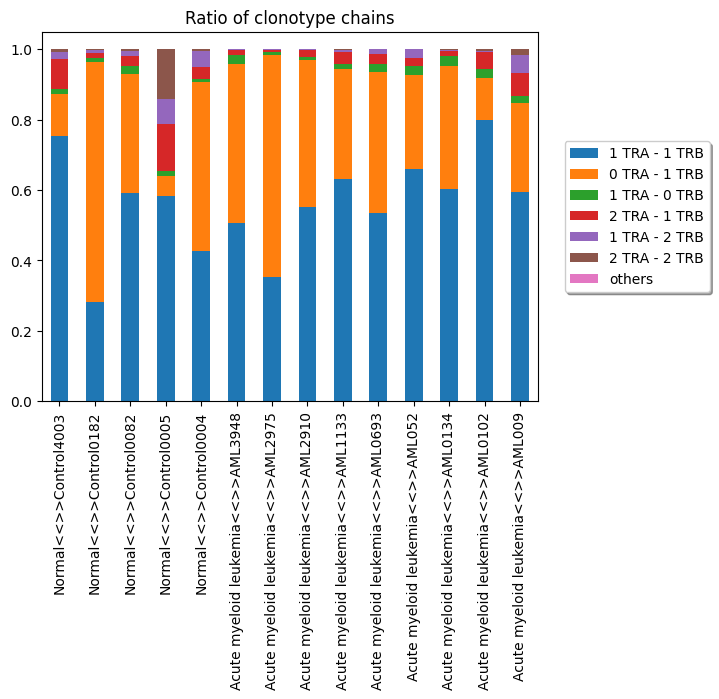

In [252]:
ax = visualize_fraction_clo_df.plot(kind='bar', stacked=True, title='Ratio of clonotype chains', xlabel='')
ax.legend(loc='center left', bbox_to_anchor=(1.04, 0.5),
          fancybox=True, shadow=True, ncol=1)
plt.show()

## 2. Shannon entropy

Currently, I dont know how to calculate clonotype counts from TRA counts and TRB counts, so I just basically fomulate:
```
clonotype_count = min(TRAcount, TRBcount)
```

In [7]:
pd.set_option('display.max_columns', None)

In [9]:
DF.head()

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,fwr1,fwr1_nt,cdr1,cdr1_nt,fwr2,fwr2_nt,cdr2,cdr2_nt,fwr3,fwr3_nt,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,matched_with_adata
0,X2020.05.22.5prime_1.AAACCTGGTCGAAAGC,True,AAACCTGGTCGAAAGC-1_contig_1,True,492,TRA,TRAV12-3,NaN,TRAJ30,TRAC,True,True,QKEVEQDPGPLSVPEGAIVSLNCTYS,CAGAAGGAGGTGGAGCAGGATCCTGGACCACTCAGTGTTCCAGAGG...,NSAFQY,AACAGTGCTTTTCAATAC,FMWYRQYSRKGPELLMY,TTCATGTGGTACAGACAGTATTCCAGAAAAGGCCCTGAGTTGCTGA...,TYSSGN,ACATACTCCAGTGGTAAC,KEDGRFTAQVDKSSKYISLFIRDSQPSDSATYL,AAAGAAGATGGAAGGTTTACAGCACAGGTCGATAAATCCAGCAAGT...,CAMIKGDKIIF,TGTGCAATGATCAAGGGTGACAAGATCATCTTT,GKGTRLHILP,GGAAAAGGGACACGACTTCATATTCTCCCCA,1417,2,clonotype1,clonotype1_consensus_2,1.0,True
1,X2020.05.22.5prime_1.AAACCTGGTCGAAAGC,True,AAACCTGGTCGAAAGC-1_contig_2,True,492,TRB,TRBV20-1,TRBD2,TRBJ2-1,TRBC2,True,True,GAVVSQHPSRVICKSGTSVKIECRSL,GGTGCTGTCGTCTCTCAACATCCGAGCAGGGTTATCTGTAAGAGTG...,DFQATT,GACTTTCAGGCCACAACT,MFWYRQFPKQSLMLMAT,ATGTTTTGGTATCGTCAGTTCCCGAAACAGAGTCTCATGCTGATGG...,SNEGSKA,TCCAATGAGGGCTCCAAGGCC,TYEQGVEKDKFLINHASLTLSTLTVTSAHPEDSSFYI,ACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATG...,CSASGLAGGDEQFF,TGCAGTGCTTCAGGACTAGCGGGGGGGGATGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,1343,2,clonotype1,clonotype1_consensus_1,1.0,True
8,X2020.05.22.5prime_1.AAAGCAACATTTGCCC,True,AAAGCAACATTTGCCC-1_contig_1,True,492,TRB,TRBV12-3,NaN,TRBJ2-1,TRBC2,True,True,DAGVIQSPRHEVTEMGQEVTLRCKPI,GATGCTGGAGTTATCCAGTCACCCCGCCATGAGGTGACAGAGATGG...,SGHNS,TCAGGCCACAACTCC,LFWYRQTMMRGLELLIY,CTTTTCTGGTACAGACAGACCATGATGCGGGGACTGGAGTTGCTCA...,FNNNVP,TTTAACAACAACGTTCCG,IDDSGMPEDRFSAKMPNASFSTLKIQPSEPRDSAVYF,ATAGATGATTCAGGGATGCCCGAGGATCGATTCTCAGCTAAGATGC...,CASSFTEQFF,TGTGCCAGCAGTTTTACTGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,10479,14,clonotype65,clonotype65_consensus_1,1.0,True
15,X2020.05.22.5prime_1.AACCATGGTGAGGCTA,True,AACCATGGTGAGGCTA-1_contig_1,True,496,TRB,TRBV3-1,NaN,TRBJ1-1,TRBC1,True,True,DTAVSQTPKYLVTQMGNDKSIKCEQN,GACACAGCTGTTTCCCAGACTCCAAAATACCTGGTCACACAGATGG...,LGHDT,CTGGGCCATGATACT,MYWYKQDSKKFLKIMFS,ATGTATTGGTATAAACAGGACTCTAAGAAATTTCTGAAGATAATGT...,YNNKEL,TACAATAATAAGGAGCTC,IINETVPNRFSPKSPDKAHLNLHINSLELGDSAVYF,ATTATAAATGAAACAGTTCCAAATCGCTTCTCACCTAAATCTCCAG...,CASSQYPGRAEAFF,TGTGCCAGCAGCCAATATCCAGGTAGAGCTGAAGCTTTCTTT,GQGTRLTVV,GGACAAGGCACCAGACTCACAGTTGTAG,3901,9,clonotype10,clonotype10_consensus_1,2.0,True
49,X2020.05.22.5prime_1.ACACTGAGTATTCGTG,True,ACACTGAGTATTCGTG-1_contig_1,True,486,TRB,TRBV25-1,NaN,TRBJ2-1,TRBC2,True,True,EADIYQTPRYLVIGTGKKITLECSQT,GAAGCTGACATCTACCAGACCCCAAGATACCTTGTTATAGGGACAG...,MGHDK,ATGGGCCATGACAAA,MYWYQQDPGMELHLIHY,ATGTACTGGTATCAACAAGATCCAGGAATGGAACTACACCTCATCC...,SYGVNS,TCCTATGGAGTTAATTCC,TEKGDLSSESTVSRIRTEHFPLTLESARPSHTSQYL,ACAGAGAAGGGAGATCTTTCCTCTGAGTCAACAGTCTCCAGAATAA...,CASRPGTGGREQFF,TGTGCCAGCAGACCCGGGACAGGGGGGAGAGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,4784,7,clonotype109,clonotype109_consensus_1,1.0,True


In [38]:
adata.obs.columns

Index(['Number of mRNA transcripts', 'Number of genes',
       'Percentage of mitochondrial genes', 'Orig ident', 'CloneType',
       'CloneType quantity', 'Sample run', 'Sample ID', 'Subject ID',
       'Condition', 'Tissue', 'Gender', 'Storage technique',
       'Author's cell type', 'Cell source', 'Sequencing platform',
       'Quantification', 'Age', 'Dx', 'DxELN Cytogenetic', 'Cytogenetics',
       'FAB', 'BM Blasts', 'BMT in CR1', 'Risk', 'Reason', 'Age group',
       'Sampling technique', 'Sampling site', 'Genome', 'Cell sorting'],
      dtype='object')

In [39]:
DF['Condition'] = [adata.obs.loc[i, 'Condition'] for i in DF['barcode'].values]
DF['Subject ID'] = [adata.obs.loc[i, 'Subject ID'] for i in DF['barcode'].values]

/tmp/ipykernel_1598594/926159281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Condition'] = [adata.obs.loc[i, 'Condition'] for i in DF['barcode'].values]
/tmp/ipykernel_1598594/926159281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Subject ID'] = [adata.obs.loc[i, 'Subject ID'] for i in DF['barcode'].values]


- Compare Condition: between AML vs control
- Each dot is an entropy values of a Subject ID
- entropy values = f(clonotype ratio within that patient)

In [44]:
shannon_dct = {
    'bc': [],
    'clonotype_id': [],
    'clonotype_count': [],
    'Subject ID': [],
    'Condition': [],
}
for bc in DF['barcode'].unique():
    tmp_df = DF.iloc[
        DF['barcode'].values == bc,
        :
    ]
    all_chains = tmp_df['chain'].values
    if ('TRA' not in all_chains or 'TRB' not in all_chains):
        if ('TRD' not in all_chains or 'TRG' not in all_chains):
            continue
    clonotype_id = tmp_df['raw_clonotype_id'].unique()[0]
    clonotype_counts = np.min(tmp_df['umis'].values)
    subject_id =  tmp_df['Subject ID'].unique()[0]
    condition = tmp_df['Condition'].unique()[0]

    shannon_df['bc'].append(bc)
    shannon_df['clonotype_id'].append(clonotype_id)
    shannon_df['clonotype_count'].append(clonotype_counts)
    shannon_df['Subject ID'].append(subject_id)
    shannon_df['Condition'].append(condition)

In [46]:
shannon_df = pd.DataFrame(shannon_dct)

In [56]:
shannon_df = shannon_df.set_index('bc')
shannon_df

,clonotype_id,clonotype_count,Subject ID,Condition
bc,,,,
X2020.05.22.5prime_1.AAACCTGGTCGAAAGC,clonotype1,2,Control0182,Normal
X2020.05.22.5prime_1.ACCAGTACAAGTTGTC,clonotype59,2,Control0182,Normal
X2020.05.22.5prime_1.ACCCACTAGATCTGCT,clonotype16,5,Control0182,Normal
X2020.05.22.5prime_1.ACGAGGACACGCCAGT,clonotype31,1,Control0182,Normal
X2020.05.22.5prime_1.AGTAGTCGTATAGTAG,clonotype108,2,Control0182,Normal
...,...,...,...,...
X2021.04.29.0134_cDNA.TTTATGCCATTTGCCC,clonotype2,3,AML0134,Acute myeloid leukemia
X2021.04.29.0134_cDNA.TTTGCGCAGCACGCCT,clonotype12,1,AML0134,Acute myeloid leukemia
X2021.04.29.0134_cDNA.TTTGCGCCACCTCGGA,clonotype3,2,AML0134,Acute myeloid leukemia


In [57]:
shannon_df.to_csv('GSE185381_TCR/clonotypes/shannon_df.tsv', sep='\t')

In [64]:
import scipy

In [70]:
shannon_condition = {}
for con in shannon_df['Condition'].unique():
    tmp_df = shannon_df.iloc[
        shannon_df['Condition'].values == con,
        :
    ]
    for subject_id in tmp_df['Subject ID'].unique():
        tmp_df_2 = tmp_df.iloc[
            tmp_df['Subject ID'].values == subject_id,
            :
        ]
        tmp_clon, tmp_idx = np.unique(tmp_df_2['clonotype_id'].values, return_inverse=True)
        tmp_count = tmp_df_2['clonotype_count'].values
        ratio_arr = np.array([np.sum(tmp_count[tmp_idx == k]) for k in np.unique(tmp_idx)])
        ratio_arr = ratio_arr / np.sum(ratio_arr)
        tmp_key = '{}<<>>{}'.format(con, subject_id)
        if tmp_key in shannon_condition:
            print ('duplicated key: ', tmp_key)
        shannon_condition[tmp_key] = scipy.stats.entropy(ratio_arr)

In [71]:
shannon_condition

{'Normal<<>>Control0182': 5.198322921823155,
 'Normal<<>>Control0004': 6.504520287133216,
 'Normal<<>>Control0082': 5.542087499321802,
 'Normal<<>>Control0005': 4.817810529704233,
 'Normal<<>>Control4003': 6.586012859265798,
 'Acute myeloid leukemia<<>>AML2910': 4.236929667164302,
 'Acute myeloid leukemia<<>>AML0693': 4.216256845095512,
 'Acute myeloid leukemia<<>>AML2975': 4.257306200724596,
 'Acute myeloid leukemia<<>>AML3948': 4.466643350842297,
 'Acute myeloid leukemia<<>>AML009': 4.7146637523983035,
 'Acute myeloid leukemia<<>>AML0102': 5.211786203093364,
 'Acute myeloid leukemia<<>>AML052': 3.6464691524957455,
 'Acute myeloid leukemia<<>>AML1133': 4.786743087674536,
 'Acute myeloid leukemia<<>>AML0134': 4.447710528059387}

In [267]:
shannon_pvalue = scipy.stats.mannwhitneyu(
    list(shannon_condition.values())[:5],
    list(shannon_condition.values())[5:]
).pvalue

## Plot

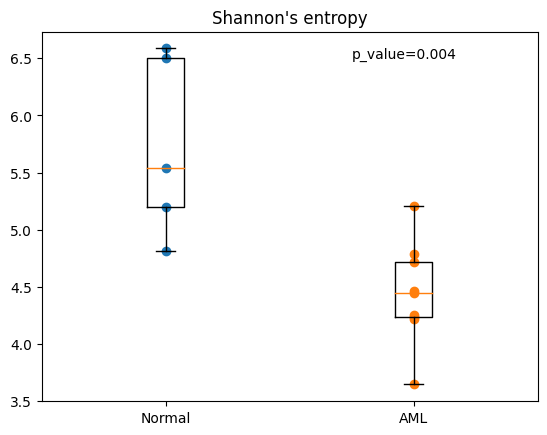

In [282]:
fig, ax = plt.subplots(nrows=1, ncols=1)
# ax[0] = plt.box(list(shannon_condition.values())[:5])
# ax[1] = plt.box(list(shannon_condition.values())[5:])
# plt.show()
normal_arr = list(shannon_condition.values())[:5]
AML_arr = list(shannon_condition.values())[5:]
ax.boxplot([
    normal_arr,
    AML_arr
])
ax.scatter(x=[1] * len(normal_arr), y=normal_arr)
ax.scatter(x=[2] * len(AML_arr), y=AML_arr)
ax.set_xticklabels(['Normal', 'AML'])
ax.set_title("Shannon's entropy")
plt.text(1.75, 6.5, 'p_value={}'.format(np.round(shannon_pvalue, 5)))
plt.show()

## 3. Clonotype proportions

- regarless UMI count of clonotype
- How many T cells express same clonotype in a patient?

In [99]:
DF['Condition<<>>SubjectID'] = DF['Condition'].values + '<<>>' + DF['Subject ID'].values

/tmp/ipykernel_1598594/1641716185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Condition<<>>SubjectID'] = DF['Condition'].values + '<<>>' + DF['Subject ID'].values


In [100]:
DF

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,fwr1,fwr1_nt,cdr1,cdr1_nt,fwr2,fwr2_nt,cdr2,cdr2_nt,fwr3,fwr3_nt,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,matched_with_adata,Condition,Subject ID,Condition<<>>SubjectID
0,X2020.05.22.5prime_1.AAACCTGGTCGAAAGC,True,AAACCTGGTCGAAAGC-1_contig_1,True,492,TRA,TRAV12-3,NaN,TRAJ30,TRAC,True,True,QKEVEQDPGPLSVPEGAIVSLNCTYS,CAGAAGGAGGTGGAGCAGGATCCTGGACCACTCAGTGTTCCAGAGG...,NSAFQY,AACAGTGCTTTTCAATAC,FMWYRQYSRKGPELLMY,TTCATGTGGTACAGACAGTATTCCAGAAAAGGCCCTGAGTTGCTGA...,TYSSGN,ACATACTCCAGTGGTAAC,KEDGRFTAQVDKSSKYISLFIRDSQPSDSATYL,AAAGAAGATGGAAGGTTTACAGCACAGGTCGATAAATCCAGCAAGT...,CAMIKGDKIIF,TGTGCAATGATCAAGGGTGACAAGATCATCTTT,GKGTRLHILP,GGAAAAGGGACACGACTTCATATTCTCCCCA,1417,2,clonotype1,clonotype1_consensus_2,1.0,True,Normal,Control0182,Normal<<>>Control0182
1,X2020.05.22.5prime_1.AAACCTGGTCGAAAGC,True,AAACCTGGTCGAAAGC-1_contig_2,True,492,TRB,TRBV20-1,TRBD2,TRBJ2-1,TRBC2,True,True,GAVVSQHPSRVICKSGTSVKIECRSL,GGTGCTGTCGTCTCTCAACATCCGAGCAGGGTTATCTGTAAGAGTG...,DFQATT,GACTTTCAGGCCACAACT,MFWYRQFPKQSLMLMAT,ATGTTTTGGTATCGTCAGTTCCCGAAACAGAGTCTCATGCTGATGG...,SNEGSKA,TCCAATGAGGGCTCCAAGGCC,TYEQGVEKDKFLINHASLTLSTLTVTSAHPEDSSFYI,ACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATG...,CSASGLAGGDEQFF,TGCAGTGCTTCAGGACTAGCGGGGGGGGATGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,1343,2,clonotype1,clonotype1_consensus_1,1.0,True,Normal,Control0182,Normal<<>>Control0182
8,X2020.05.22.5prime_1.AAAGCAACATTTGCCC,True,AAAGCAACATTTGCCC-1_contig_1,True,492,TRB,TRBV12-3,NaN,TRBJ2-1,TRBC2,True,True,DAGVIQSPRHEVTEMGQEVTLRCKPI,GATGCTGGAGTTATCCAGTCACCCCGCCATGAGGTGACAGAGATGG...,SGHNS,TCAGGCCACAACTCC,LFWYRQTMMRGLELLIY,CTTTTCTGGTACAGACAGACCATGATGCGGGGACTGGAGTTGCTCA...,FNNNVP,TTTAACAACAACGTTCCG,IDDSGMPEDRFSAKMPNASFSTLKIQPSEPRDSAVYF,ATAGATGATTCAGGGATGCCCGAGGATCGATTCTCAGCTAAGATGC...,CASSFTEQFF,TGTGCCAGCAGTTTTACTGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,10479,14,clonotype65,clonotype65_consensus_1,1.0,True,Normal,Control0182,Normal<<>>Control0182
15,X2020.05.22.5prime_1.AACCATGGTGAGGCTA,True,AACCATGGTGAGGCTA-1_contig_1,True,496,TRB,TRBV3-1,NaN,TRBJ1-1,TRBC1,True,True,DTAVSQTPKYLVTQMGNDKSIKCEQN,GACACAGCTGTTTCCCAGACTCCAAAATACCTGGTCACACAGATGG...,LGHDT,CTGGGCCATGATACT,MYWYKQDSKKFLKIMFS,ATGTATTGGTATAAACAGGACTCTAAGAAATTTCTGAAGATAATGT...,YNNKEL,TACAATAATAAGGAGCTC,IINETVPNRFSPKSPDKAHLNLHINSLELGDSAVYF,ATTATAAATGAAACAGTTCCAAATCGCTTCTCACCTAAATCTCCAG...,CASSQYPGRAEAFF,TGTGCCAGCAGCCAATATCCAGGTAGAGCTGAAGCTTTCTTT,GQGTRLTVV,GGACAAGGCACCAGACTCACAGTTGTAG,3901,9,clonotype10,clonotype10_consensus_1,2.0,True,Normal,Control0182,Normal<<>>Control0182
49,X2020.05.22.5prime_1.ACACTGAGTATTCGTG,True,ACACTGAGTATTCGTG-1_contig_1,True,486,TRB,TRBV25-1,NaN,TRBJ2-1,TRBC2,True,True,EADIYQTPRYLVIGTGKKITLECSQT,GAAGCTGACATCTACCAGACCCCAAGATACCTTGTTATAGGGACAG...,MGHDK,ATGGGCCATGACAAA,MYWYQQDPGMELHLIHY,ATGTACTGGTATCAACAAGATCCAGGAATGGAACTACACCTCATCC...,SYGVNS,TCCTATGGAGTTAATTCC,TEKGDLSSESTVSRIRTEHFPLTLESARPSHTSQYL,ACAGAGAAGGGAGATCTTTCCTCTGAGTCAACAGTCTCCAGAATAA...,CASRPGTGGREQFF,TGTGCCAGCAGACCCGGGACAGGGGGGAGAGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,4784,7,clonotype109,clonotype109_consensus_1,1.0,True,Normal,Control0182,Normal<<>>Control0182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,X2021.04.29.0134_cDNA.TTTGGTTCAGTATAAG,True,TTTGGTTCAGTATAAG-1_contig_1,True,495,TRB,TRBV12-3,NaN,TRBJ2-2,TRBC2,True,True,DAGVIQSPRHEVTEMGQEVTLRCKPI,GATGCTGGAGTTATCCAGTCACCCCGCCATGAGGTGACAGAGATGG...,SGHNS,TCAGGCCACAACTCC,LFWYRQTMMRGLELLIY,CTTTTCTGGTACAGACAGACCATGATGCGGGGACTGGAGTTGCTCA...,FNNNVP,TTTAACAACAACGTTCCG,IDDSGMPEDRFSAKMPNASFSTLKIQPSEPRDSAVYF,ATAGATGATTCAGGGATGCCCGAGGATCGATTCTCAGCTAAGATGC...,CASTATWELFF,TGTGCCAGCACCGCGACCTGGGAGCTGTTTTTT,GEGSRLTVL,GGAGAAGGCTCTAGGCTGACCGTACTGG,19377,12,clonotype125,clonotype125_consensus_1,1.0,True,Acute myeloid leukemia,AML

In [173]:
clono_proportion = {
    'groups': [],
    'n = 1': [],
    'n = 2': [],
    'n = 3': [],
    'n = 4': [],
    'n = 5': [],
    'n > 5': [],
}
for i in DF['Condition<<>>SubjectID'].unique():
    tmp_df = DF.iloc[
        DF['Condition<<>>SubjectID'].values == i,
        :
    ]
    _, chosen_idx = np.unique(tmp_df['barcode'], return_index=True)
    tmp_df = tmp_df.iloc[
        chosen_idx,
        :
    ]
    clono_arr = tmp_df['raw_clonotype_id'].values
    
    uni_clo, count_clo = np.unique(clono_arr, return_counts=True)
    clono_proportion['groups'].append(i)
    
    clono_proportion['n = 1'].append(np.sum(count_clo == 1) / count_clo.shape[0])
    clono_proportion['n = 2'].append(np.sum(count_clo == 2) / count_clo.shape[0])
    clono_proportion['n = 3'].append(np.sum(count_clo == 3) / count_clo.shape[0])
    clono_proportion['n = 4'].append(np.sum(count_clo == 4) / count_clo.shape[0])
    clono_proportion['n = 5'].append(np.sum(count_clo == 5) / count_clo.shape[0])
    clono_proportion['n > 5'].append(np.sum(count_clo > 5) / count_clo.shape[0])

    

In [174]:
clono_proportion_df = pd.DataFrame(clono_proportion)
clono_proportion_df = clono_proportion_df.set_index('groups')

In [175]:
clono_proportion_df = clono_proportion_df.sort_index(ascending=False)

In [176]:
clono_proportion_df

,n = 1,n = 2,n = 3,n = 4,n = 5,n > 5
groups,,,,,,
Normal<<>>Control4003,0.594088,0.322278,0.029560,0.015862,0.007931,0.030281
Normal<<>>Control0182,0.868876,0.044669,0.020173,0.012968,0.017291,0.036023
Normal<<>>Control0082,0.891589,0.052336,0.028037,0.007477,0.003738,0.016822
Normal<<>>Control0005,0.923567,0.070064,0.006369,0.000000,0.000000,0.000000
Normal<<>>Control0004,0.956142,0.018192,0.006346,0.004231,0.001833,0.013256
Acute myeloid leukemia<<>>AML3948,0.852823,0.066532,0.019153,0.010081,0.007056,0.044355
Acute myeloid leukemia<<>>AML2975,0.887868,0.042279,0.023897,0.011029,0.005515,0.029412
Acute myeloid leukemia<<>>AML2910,0.807018,0.070175,0.040936,0.011696,0.005848,0.064327
Acute myeloid leukemia<<>>AML1133,0.851590,0.084806,0.014134,0.014134,0.007067,0.028269


In [210]:
clono_proportion_df.to_csv('GSE185381_TCR/clonotypes/clono_proportion_df.tsv', sep='\t')

## Plot

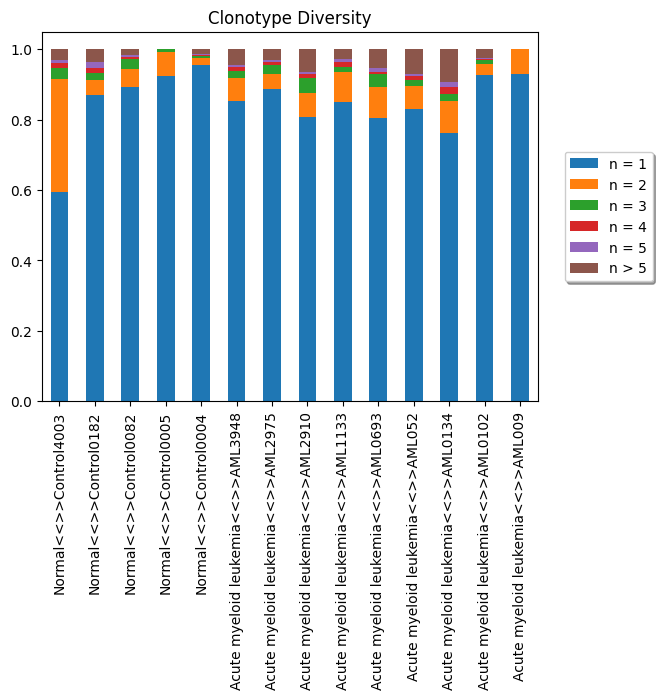

In [253]:
ax = clono_proportion_df.plot(kind='bar', stacked=True, title='Clonotype Diversity', xlabel='')
ax.legend(loc='center left', bbox_to_anchor=(1.04, 0.5),
          fancybox=True, shadow=True, ncol=1)
plt.show()

## 4. cdr3 length

In [202]:
DF.head()

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,fwr1,fwr1_nt,cdr1,cdr1_nt,fwr2,fwr2_nt,cdr2,cdr2_nt,fwr3,fwr3_nt,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,matched_with_adata,Condition,Subject ID,Condition<<>>SubjectID
0,X2020.05.22.5prime_1.AAACCTGGTCGAAAGC,True,AAACCTGGTCGAAAGC-1_contig_1,True,492,TRA,TRAV12-3,NaN,TRAJ30,TRAC,True,True,QKEVEQDPGPLSVPEGAIVSLNCTYS,CAGAAGGAGGTGGAGCAGGATCCTGGACCACTCAGTGTTCCAGAGG...,NSAFQY,AACAGTGCTTTTCAATAC,FMWYRQYSRKGPELLMY,TTCATGTGGTACAGACAGTATTCCAGAAAAGGCCCTGAGTTGCTGA...,TYSSGN,ACATACTCCAGTGGTAAC,KEDGRFTAQVDKSSKYISLFIRDSQPSDSATYL,AAAGAAGATGGAAGGTTTACAGCACAGGTCGATAAATCCAGCAAGT...,CAMIKGDKIIF,TGTGCAATGATCAAGGGTGACAAGATCATCTTT,GKGTRLHILP,GGAAAAGGGACACGACTTCATATTCTCCCCA,1417,2,clonotype1,clonotype1_consensus_2,1.0,True,Normal,Control0182,Normal<<>>Control0182
1,X2020.05.22.5prime_1.AAACCTGGTCGAAAGC,True,AAACCTGGTCGAAAGC-1_contig_2,True,492,TRB,TRBV20-1,TRBD2,TRBJ2-1,TRBC2,True,True,GAVVSQHPSRVICKSGTSVKIECRSL,GGTGCTGTCGTCTCTCAACATCCGAGCAGGGTTATCTGTAAGAGTG...,DFQATT,GACTTTCAGGCCACAACT,MFWYRQFPKQSLMLMAT,ATGTTTTGGTATCGTCAGTTCCCGAAACAGAGTCTCATGCTGATGG...,SNEGSKA,TCCAATGAGGGCTCCAAGGCC,TYEQGVEKDKFLINHASLTLSTLTVTSAHPEDSSFYI,ACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATG...,CSASGLAGGDEQFF,TGCAGTGCTTCAGGACTAGCGGGGGGGGATGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,1343,2,clonotype1,clonotype1_consensus_1,1.0,True,Normal,Control0182,Normal<<>>Control0182
8,X2020.05.22.5prime_1.AAAGCAACATTTGCCC,True,AAAGCAACATTTGCCC-1_contig_1,True,492,TRB,TRBV12-3,NaN,TRBJ2-1,TRBC2,True,True,DAGVIQSPRHEVTEMGQEVTLRCKPI,GATGCTGGAGTTATCCAGTCACCCCGCCATGAGGTGACAGAGATGG...,SGHNS,TCAGGCCACAACTCC,LFWYRQTMMRGLELLIY,CTTTTCTGGTACAGACAGACCATGATGCGGGGACTGGAGTTGCTCA...,FNNNVP,TTTAACAACAACGTTCCG,IDDSGMPEDRFSAKMPNASFSTLKIQPSEPRDSAVYF,ATAGATGATTCAGGGATGCCCGAGGATCGATTCTCAGCTAAGATGC...,CASSFTEQFF,TGTGCCAGCAGTTTTACTGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,10479,14,clonotype65,clonotype65_consensus_1,1.0,True,Normal,Control0182,Normal<<>>Control0182
15,X2020.05.22.5prime_1.AACCATGGTGAGGCTA,True,AACCATGGTGAGGCTA-1_contig_1,True,496,TRB,TRBV3-1,NaN,TRBJ1-1,TRBC1,True,True,DTAVSQTPKYLVTQMGNDKSIKCEQN,GACACAGCTGTTTCCCAGACTCCAAAATACCTGGTCACACAGATGG...,LGHDT,CTGGGCCATGATACT,MYWYKQDSKKFLKIMFS,ATGTATTGGTATAAACAGGACTCTAAGAAATTTCTGAAGATAATGT...,YNNKEL,TACAATAATAAGGAGCTC,IINETVPNRFSPKSPDKAHLNLHINSLELGDSAVYF,ATTATAAATGAAACAGTTCCAAATCGCTTCTCACCTAAATCTCCAG...,CASSQYPGRAEAFF,TGTGCCAGCAGCCAATATCCAGGTAGAGCTGAAGCTTTCTTT,GQGTRLTVV,GGACAAGGCACCAGACTCACAGTTGTAG,3901,9,clonotype10,clonotype10_consensus_1,2.0,True,Normal,Control0182,Normal<<>>Control0182
49,X2020.05.22.5prime_1.ACACTGAGTATTCGTG,True,ACACTGAGTATTCGTG-1_contig_1,True,486,TRB,TRBV25-1,NaN,TRBJ2-1,TRBC2,True,True,EADIYQTPRYLVIGTGKKITLECSQT,GAAGCTGACATCTACCAGACCCCAAGATACCTTGTTATAGGGACAG...,MGHDK,ATGGGCCATGACAAA,MYWYQQDPGMELHLIHY,ATGTACTGGTATCAACAAGATCCAGGAATGGAACTACACCTCATCC...,SYGVNS,TCCTATGGAGTTAATTCC,TEKGDLSSESTVSRIRTEHFPLTLESARPSHTSQYL,ACAGAGAAGGGAGATCTTTCCTCTGAGTCAACAGTCTCCAGAATAA...,CASRPGTGGREQFF,TGTGCCAGCAGACCCGGGACAGGGGGGAGAGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,4784,7,clonotype109,clonotype109_consensus_1,1.0,True,Normal,Control0182,Normal<<>>Control0182


In [295]:
cdr3beta_df = DF.iloc[
    DF['chain'].values == 'TRB',
    :
]
cdr3beta_df['cdr3_length'] = [
    len(cdr3beta_df['cdr3'].values[i]) 
    for i in range(len(cdr3beta_df))
]
cdr3beta_df = cdr3beta_df[['cdr3', 'cdr3_length', 'Condition']]
cdr3beta_df

/tmp/ipykernel_1598594/434669383.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdr3beta_df['cdr3_length'] = [


,cdr3,cdr3_length,Condition
1,CSASGLAGGDEQFF,14,Normal
8,CASSFTEQFF,10,Normal
15,CASSQYPGRAEAFF,14,Normal
49,CASRPGTGGREQFF,14,Normal
56,CASSADGGNTIYF,13,Normal
...,...,...,...
1932,CASSSAPLPGEQYF,14,Acute myeloid leukemia
1933,CASSVGQSTDTQYF,14,Acute myeloid leukemia
1935,CASTATWELFF,11,Acute myeloid leukemia
1938,CASSYQTGGEYEQYF,15,Acute myeloid leukemia


In [303]:
cdr3beta_df.to_csv('GSE185381_TCR/clonotypes/cdr3beta_length_df.tsv', sep='\t')

In [307]:
cdr3beta_proportion_dct = {'condition': []}
cdr3beta_proportion_dct.update({
    i: [0, 0]
    for i in range(cdr3beta_df['cdr3_length'].min(), cdr3beta_df['cdr3_length'].max() + 1)
})

for con_idx in range(len(cdr3beta_df['Condition'].unique())):
    con = cdr3beta_df['Condition'].unique()[con_idx]
    tmp_df = cdr3beta_df.iloc[
        cdr3beta_df['Condition'].values == con,
        :
    ]
    all_len = tmp_df['cdr3_length'].values
    x, y = np.unique(all_len, return_counts=True)
    for i in range(len(x)):
        cdr3_len = x[i]
        cdr3_len_count = y[i]
        cdr3beta_proportion_dct[cdr3_len][con_idx] = cdr3_len_count / np.sum(y)
    
    cdr3beta_proportion_dct['condition'].append(con)

In [316]:
cdr3beta_proportion_df = pd.DataFrame(cdr3beta_proportion_dct)
cdr3beta_proportion_df = cdr3beta_proportion_df.set_index('condition')

In [317]:
cdr3beta_proportion_df

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
condition,,,,,,,,,,,,,,,,,,,,
Normal,0.000000,0.002647,0.002154,0.001970,0.036130,0.058965,0.178556,0.239860,0.235120,0.138795,0.057857,0.034037,0.009171,0.003324,0.000923,0.000308,0.000062,0.000000,0.000000,0.000123
Acute myeloid leukemia,0.000484,0.000121,0.000242,0.007992,0.019133,0.049043,0.119642,0.220877,0.298135,0.127028,0.101720,0.035723,0.013563,0.002543,0.001574,0.001574,0.000242,0.000121,0.000242,0.000000


## Plot

In [390]:
bin_edge = np.arange(0, 27, 2).astype('int')

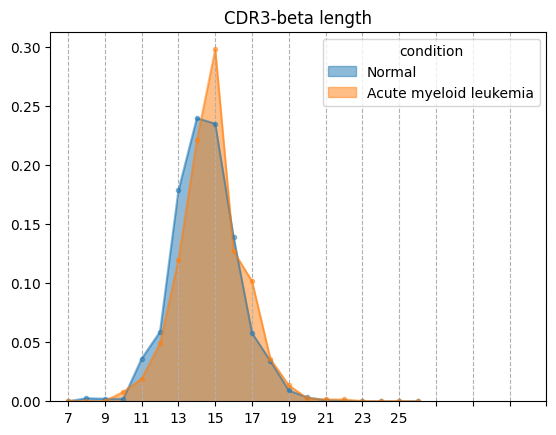

In [410]:
ax = cdr3beta_proportion_df.T.plot(
    kind='area', 
    stacked=False,
    alpha=0.5,
    xticks=bin_edge,
    style='.-'
)
ax.set_title('CDR3-beta length')
ax.grid('on', linestyle='--', axis='x')
plt.show()

## 5. Clonal diversity on UMAP

In [413]:
DF['barcode'].unique()

array(['X2020.05.22.5prime_1.AAACCTGGTCGAAAGC',
       'X2020.05.22.5prime_1.AAAGCAACATTTGCCC',
       'X2020.05.22.5prime_1.AACCATGGTGAGGCTA', ...,
       'X2021.04.29.0134_cDNA.TTTGGTTCAGTATAAG',
       'X2021.04.29.0134_cDNA.TTTGTCACAAGAGGCT',
       'X2021.04.29.0134_cDNA.TTTGTCACAATGCCAT'], dtype=object)

In [414]:
filtered_adata = adata.copy()
filtered_adata.obs['chosen_cells'] = False
filtered_adata.obs.loc[
    DF['barcode'].unique(),
    'chosen_cells'
] = True
filtered_adata = filtered_adata[
    filtered_adata.obs['chosen_cells'].values,
    :
]

In [415]:
filtered_adata

View of AnnData object with n_obs × n_vars = 24118 × 22580
    obs: 'Number of mRNA transcripts', 'Number of genes', 'Percentage of mitochondrial genes', 'Orig ident', 'CloneType', 'CloneType quantity', 'Sample run', 'Sample ID', 'Subject ID', 'Condition', 'Tissue', 'Gender', 'Storage technique', "Author's cell type", 'Cell source', 'Sequencing platform', 'Quantification', 'Age', 'Dx', 'DxELN Cytogenetic', 'Cytogenetics', 'FAB', 'BM Blasts', 'BMT in CR1', 'Risk', 'Reason', 'Age group', 'Sampling technique', 'Sampling site', 'Genome', 'Cell sorting', 'chosen_cells'
    obsm: 'X_harmony_(sample_id)', 'X_pca', 'X_pca_(no_batch_corrected)', 'X_tsne', 'X_tsne_(perplexity=30)', 'X_umap'

In [ ]:
scanpy.pl.umap(filtered_adata, color=["Author's cell type"], s=5)